In [2]:
library(PerformanceAnalytics)
library(xts)
library(lubridate)
library(dplyr)
library(data.table)
library(tidyr)

Warning message:
"package 'PerformanceAnalytics' was built under R version 4.3.3"
Loading required package: xts

Warning message:
"package 'xts' was built under R version 4.3.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.3.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly

In [3]:
apple_data = read.csv("Module_06_Data/AAPL.csv")
amc_data = read.csv("Module_06_Data/AMC.csv")
amzn_data = read.csv("Module_06_Data/AMZN.csv")
cost_data = read.csv("Module_06_Data/COST.csv")
gspc_data = read.csv("Module_06_Data/gspc.csv")
msft_data = read.csv("Module_06_Data/MSFT.csv")
nvda_data = read.csv("Module_06_Data/NVDA.csv")
tgt_data = read.csv("Module_06_Data/TGT.csv")
wmt_data = read.csv("Module_06_Data/WMT.csv")



stock_df_list = stock_df_list = list(
  AAPL = apple_data,
  AMC = amc_data,
  AMZN = amzn_data,
  COST = cost_data,
  GSPC = gspc_data,
  MSFT = msft_data,
  NVDA = nvda_data,
  TGT = tgt_data,
  WMT = wmt_data
)


In [4]:

apple_return <- as.vector(apple_data$Return)
amc_return <- as.vector(amc_data$Return)
amzn_return <-as.vector(amzn_data$Return)
cost_return= as.vector(cost_data$Return)
gspc_return=as.vector(gspc_data$Return)
msft_return=as.vector(msft_data$Return)
nvda_return=as.vector(nvda_data$Return)
tgt_return=as.vector(tgt_data$Return)
wmt_return=as.vector(wmt_data$Return)
dates = as.vector(apple_data$Date)

stockprice_df <- as.data.frame(cbind(dates,apple_return, amc_return, amzn_return,cost_return,gspc_return,msft_return,nvda_return,tgt_return,wmt_return))

stockprice_df$Date <- as.Date(stockprice_df$dates)

In [6]:
#nov_2023 %>% stockprice_df[stockprice_df["Date"]=="2023-10-31"]

In [105]:
filtered_df = filter(stockprice_df,dates=="2023-11-30")
melted_df <- pivot_longer(filtered_df, cols = -Date, names_to = "variable", values_to = "value")

In [106]:
melted_df

Date,variable,value
<date>,<chr>,<chr>
2023-11-30,dates,2023-11-30
2023-11-30,apple_return,0.113780227
2023-11-30,amc_return,-0.377340833
2023-11-30,amzn_return,0.097678266
2023-11-30,cost_return,0.074918007
2023-11-30,gspc_return,0.089179269
2023-11-30,msft_return,0.122945396
2023-11-30,nvda_return,0.146885739
2023-11-30,tgt_return,0.22029046


In [107]:
filtered_df = filter(stockprice_df,dates=="2023-10-31")
melted_df <- pivot_longer(filtered_df, cols = -Date, names_to = "variable", values_to = "value")

melted_df

Date,variable,value
<date>,<chr>,<chr>
2023-10-31,dates,2023-10-31
2023-10-31,apple_return,-0.002569851
2023-10-31,amc_return,0.336670915
2023-10-31,amzn_return,0.046963448
2023-10-31,cost_return,-0.02216071
2023-10-31,gspc_return,-0.021979689
2023-10-31,msft_return,0.070815336
2023-10-31,nvda_return,-0.062507193
2023-10-31,tgt_return,0.00198966


In [9]:
max_index_nov <- which.max(melted_df$value)

# Return the entire row based on that index
max_row <- melted_df[max_index_nov, ]
max_row

Warning message in which.max(melted_df$value):
"NAs introduced by coercion"


Date,variable,value
<date>,<chr>,<chr>
2023-10-31,amc_return,0.336670915


In [10]:
for (i in seq_along(stock_df_list)) {
  df <- stock_df_list[[i]]
  
  # Try parsing the Date column
  df$Date <- parse_date_time(df$Date, orders = c("mdy", "ymd", "dmy"), quiet = TRUE)
  
  # Check for NAs after parsing
  if (any(is.na(df$Date))) {
    warning(paste("NAs in Date for dataframe:", names(data_list)[i]))
  }
  
  # Sort by Date
  df <- df[order(df$Date), ]

  xts(df[,-1],order.by = df[,1])
  
  # Update the list with the sorted data frame
  stock_df_list[[i]] <- df
}

In [11]:
max_index <- which.max(stock_df_list["NVDA"]$NVDA$Return)

# Return the entire row based on that index
max_row <- stock_df_list["NVDA"]$NVDA[max_index, ]
max_row

,Date,Return
,<dttm>,<dbl>
21,2023-05-31,0.3634365


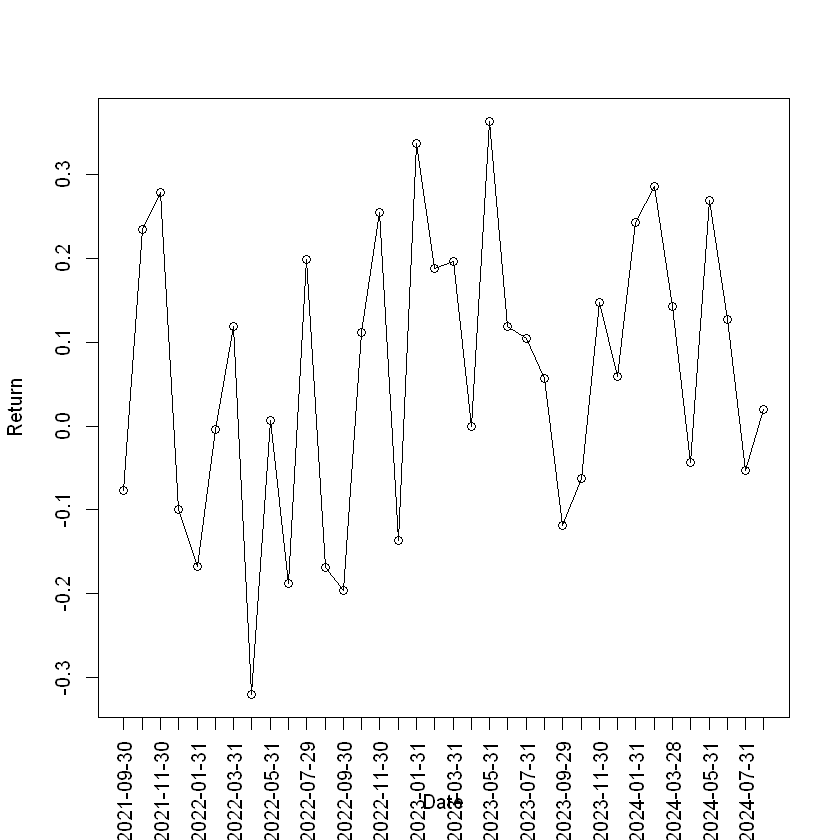

In [12]:
# R code
plot(stock_df_list["NVDA"]$NVDA$Return, type="o", xaxt='n', xlab="Date", ylab="Return")
axis(1, at=1:length(stock_df_list["NVDA"]$NVDA$Date), labels=format(stock_df_list["NVDA"]$NVDA$Date, "%Y-%m-%d"), las=2)


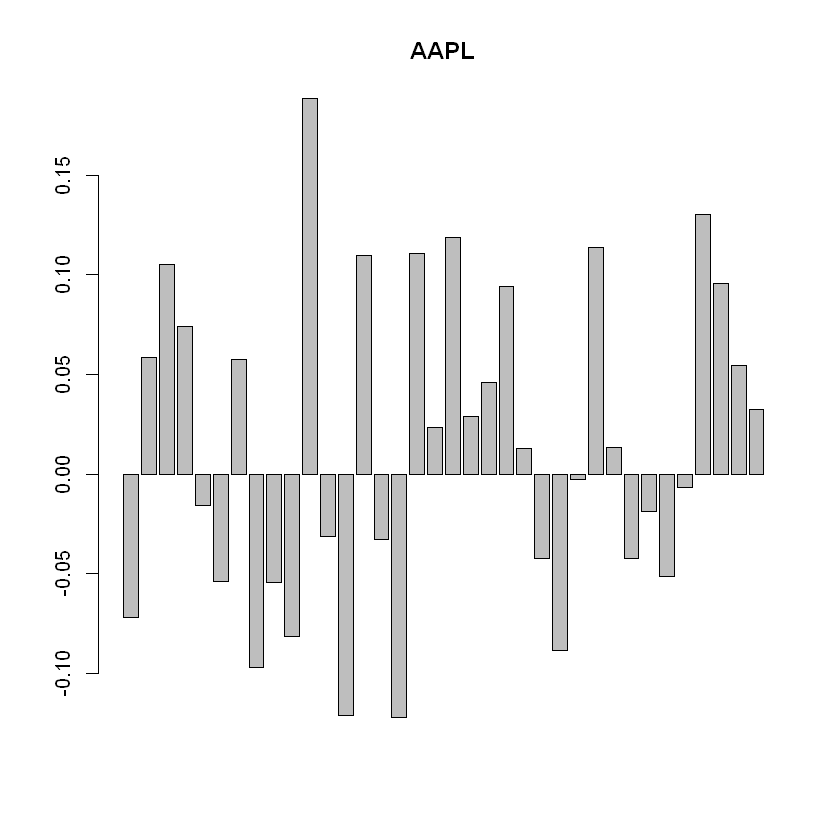

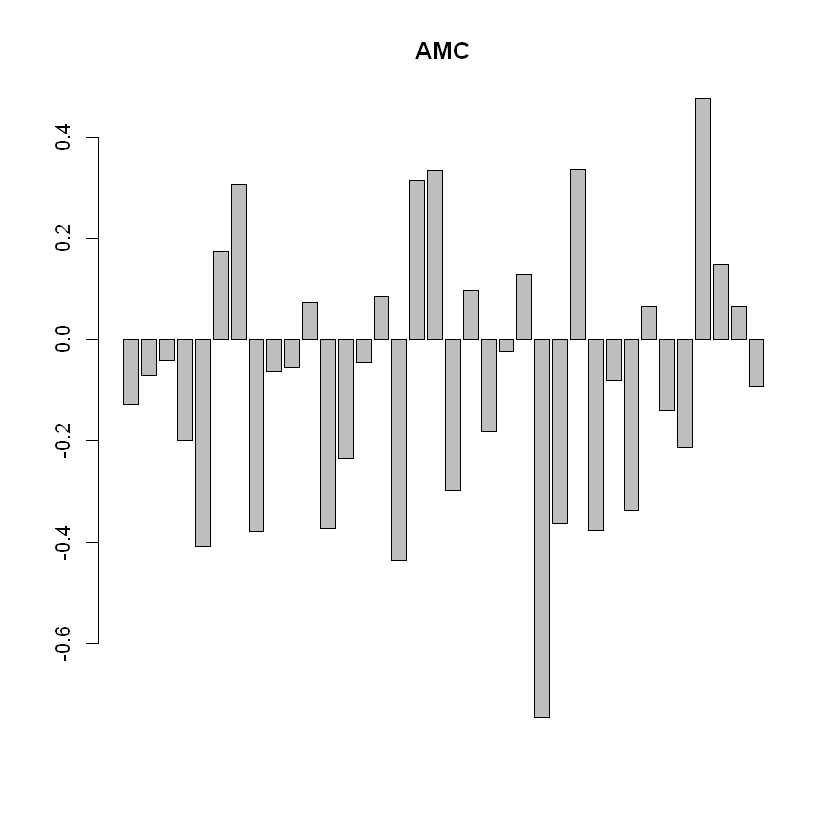

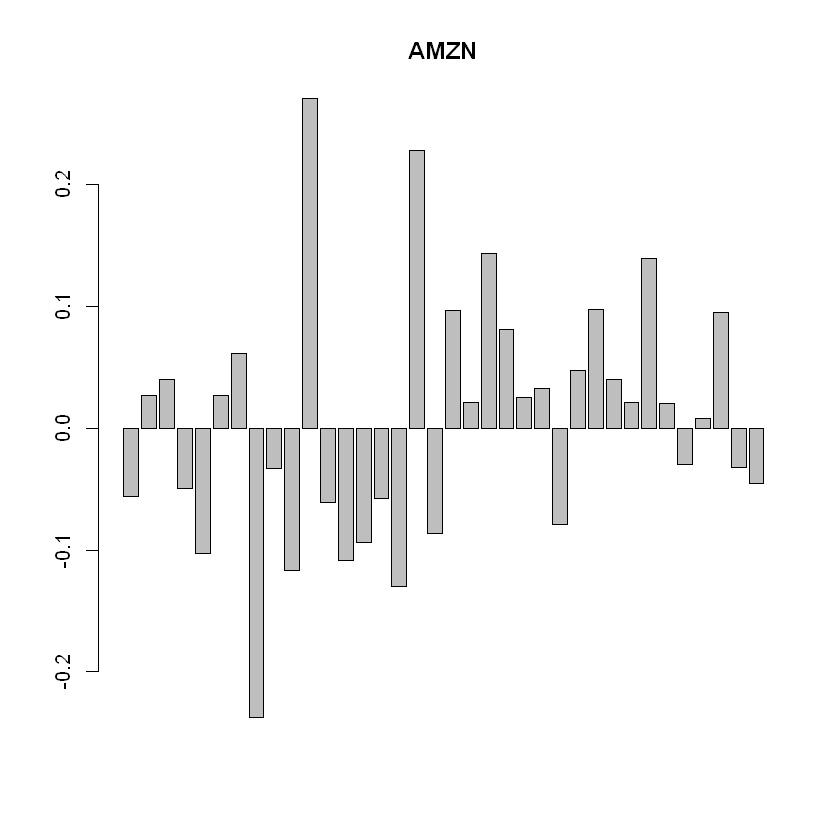

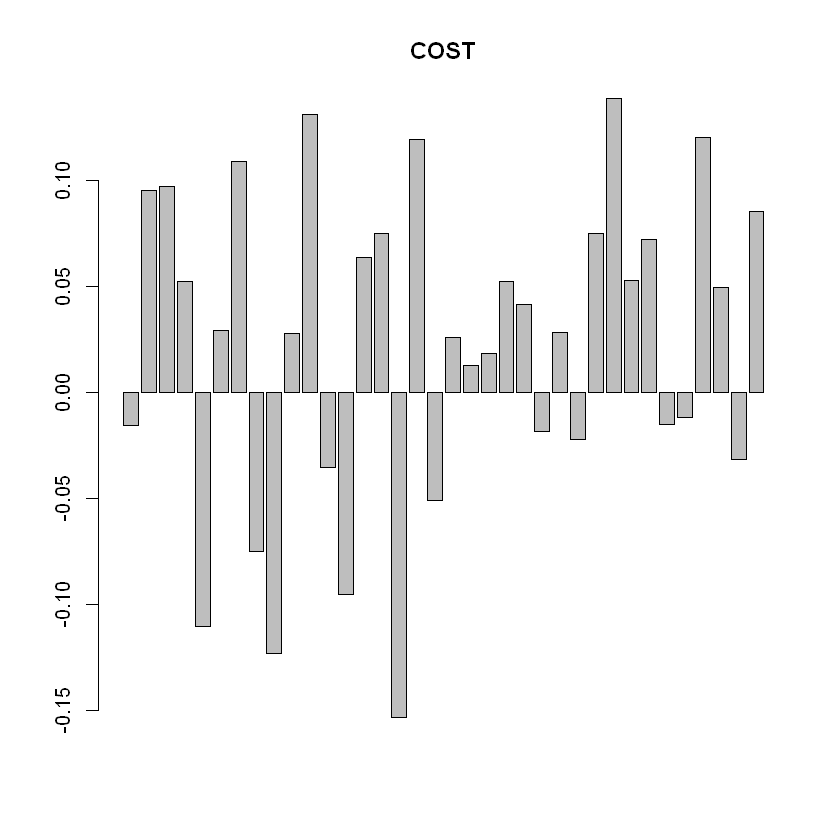

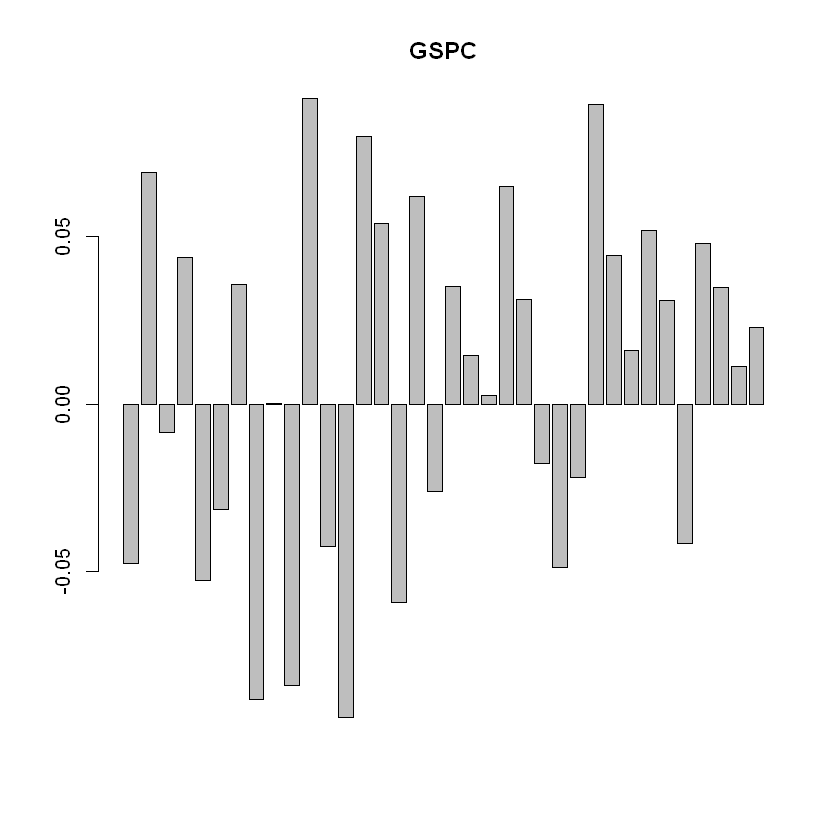

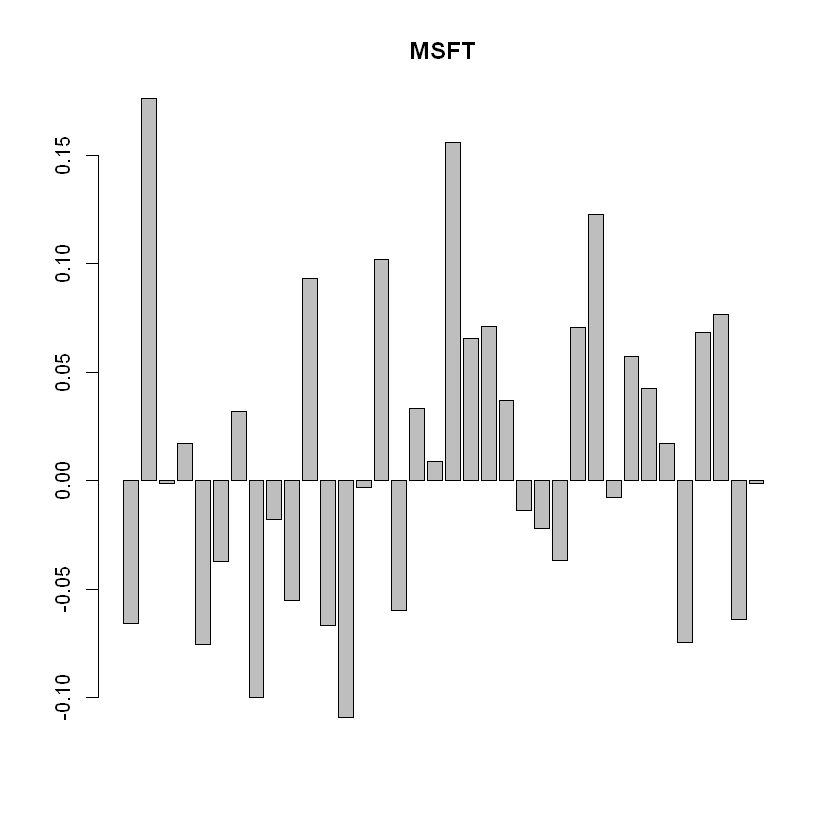

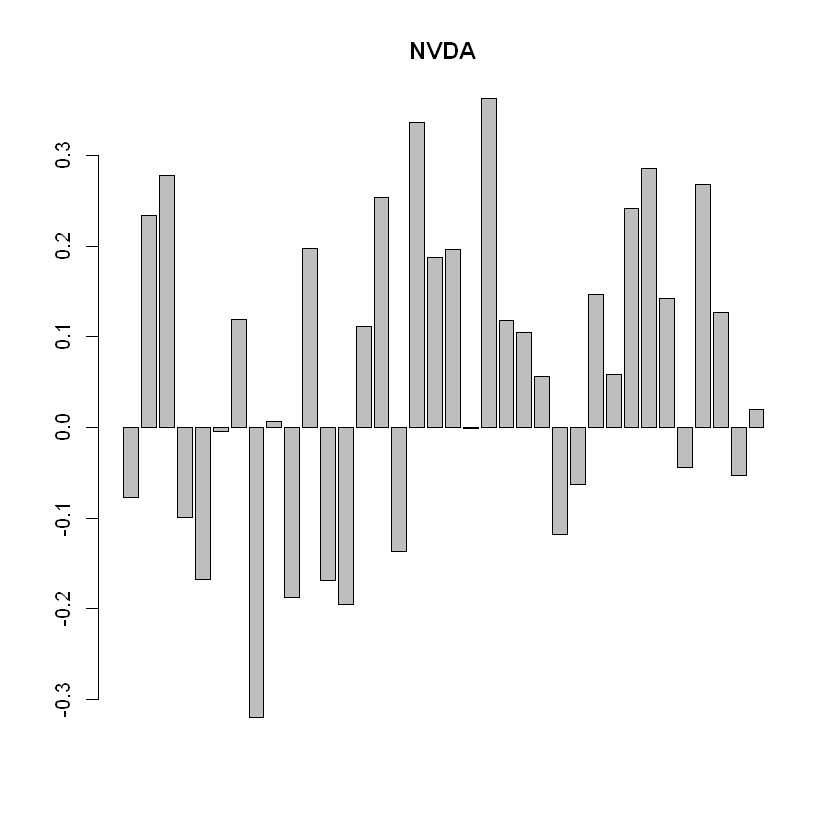

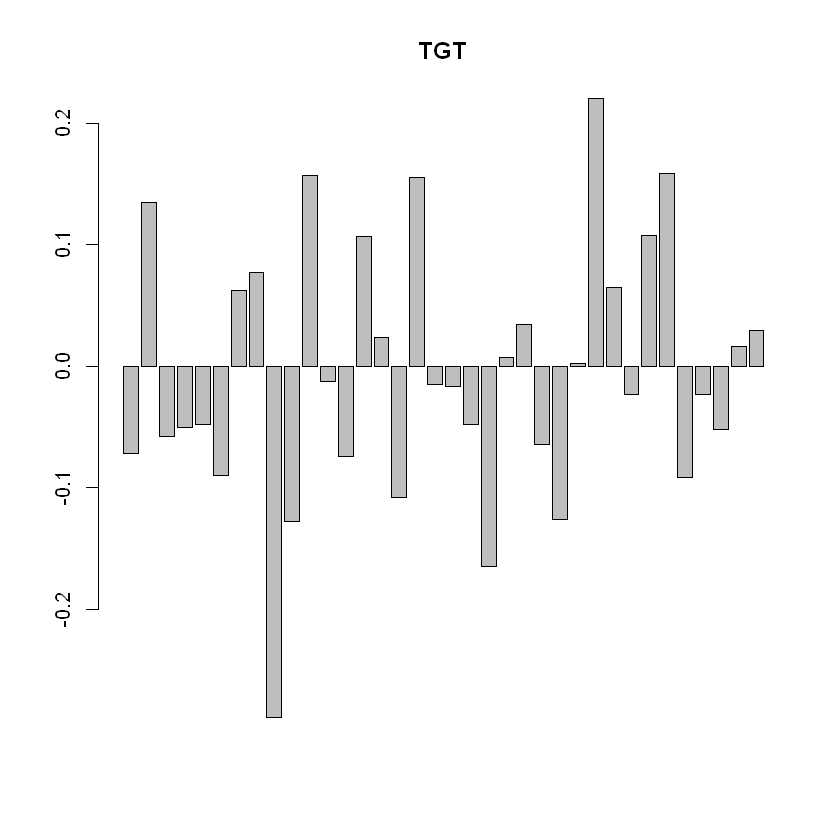

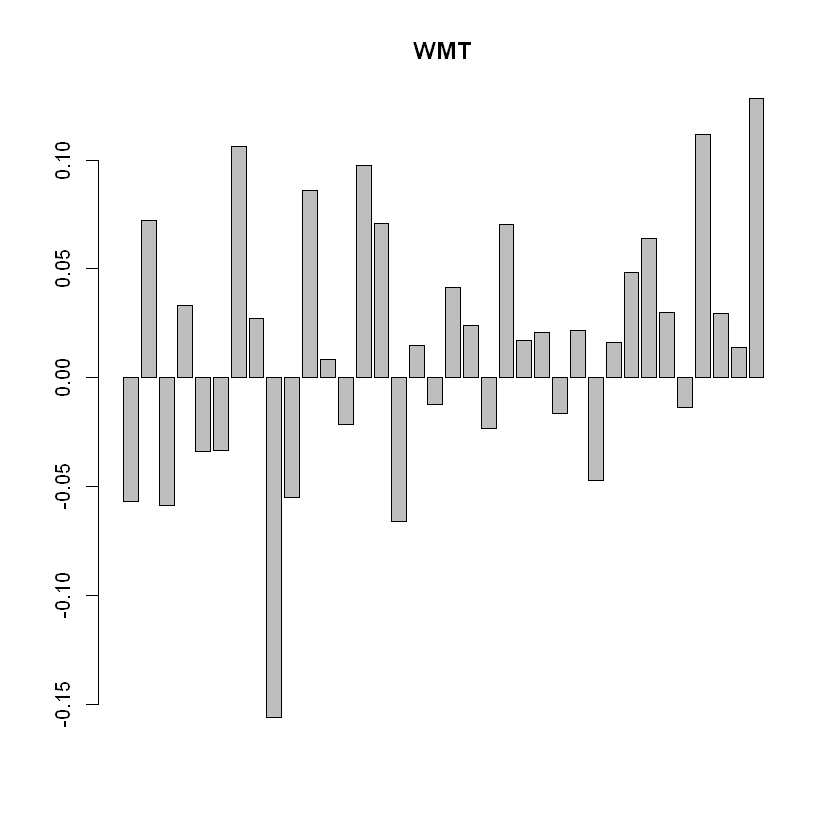

In [13]:
for (i in seq_along(stock_df_list)) {
  df <- stock_df_list[[i]]

  barplot(df$Return,main = names(stock_df_list[i]))
  
  
}

In [14]:
test_df = stock_df_list["AAPL"]$AAPL

sd(test_df$Return)

sd_list <- list()
for (i in seq_along(stock_df_list)) {
  df <- stock_df_list[[i]]

  standard_dev = sd(df$Return)

  #print(table.Stats(df$Return))
  
 
  
  output = c(Stock = names(stock_df_list)[i], Standard_Deviation = standard_dev)
  sd_list[[i]] <- output
}

sd_df <- do.call(rbind, sd_list)

sd_df <- as.data.frame(sd_df)
print(sd_df)

[1] 0.07902984

  Stock Standard_Deviation
1  AAPL  0.079029839001119
2   AMC  0.265520707144589
3  AMZN  0.101582831994138
4  COST 0.0743028260311011
5  GSPC 0.0513647248189277
6  MSFT 0.0707112174148177
7  NVDA  0.172192658428897
8   TGT  0.104212996152102
9   WMT  0.059147354411843


Stock,Standard_Deviation
<chr>,<chr>
AAPL,0.079029839001119
AMC,0.265520707144589
AMZN,0.101582831994138
COST,0.0743028260311011
GSPC,0.0513647248189277
MSFT,0.0707112174148177
NVDA,0.172192658428897
TGT,0.104212996152102
WMT,0.059147354411843


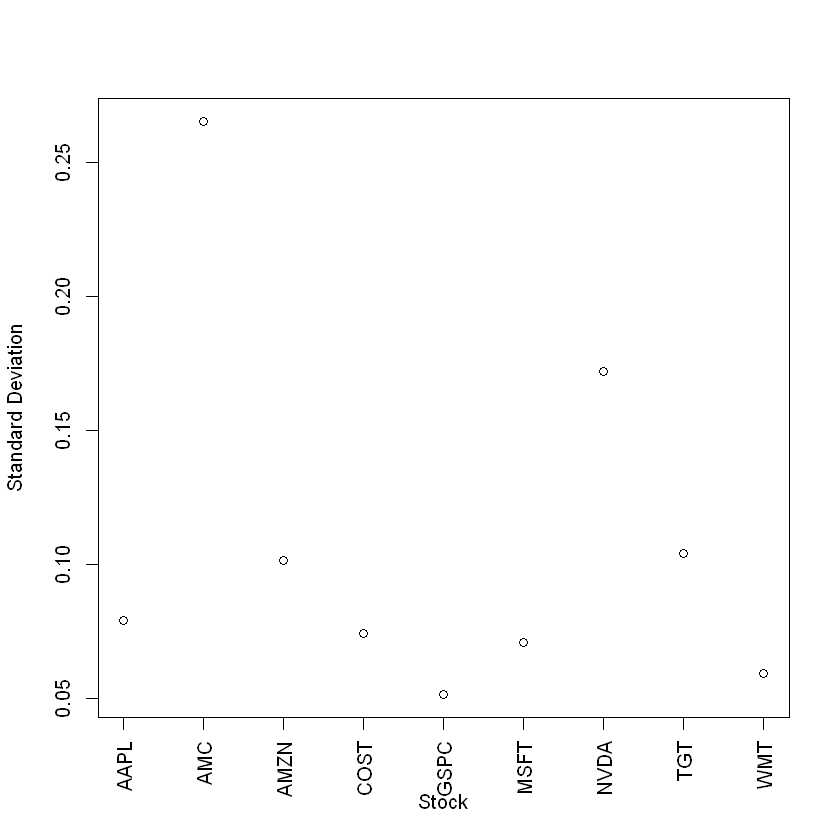

In [15]:
sd_df <- do.call(rbind, sd_list)

# Convert to data frame and set column names
sd_df <- as.data.frame(sd_df)
sd_df
# Print the results data frame
plot(sd_df$Standard_Deviation, xaxt = "n", xlab = "Stock", ylab = "Standard Deviation")

axis(1, at = 1:length(sd_df$Stock), labels = sd_df$Stock, las=2)

In [16]:
sorted_df <- sd_df[order(sd_df$Standard_Deviation), ]

sorted_df

,Stock,Standard_Deviation
,<chr>,<chr>
5,GSPC,0.0513647248189277
9,WMT,0.059147354411843
6,MSFT,0.0707112174148177
4,COST,0.0743028260311011
1,AAPL,0.079029839001119
3,AMZN,0.101582831994138
8,TGT,0.104212996152102
7,NVDA,0.172192658428897
2,AMC,0.265520707144589


In [17]:
Return.cumulative(stock_df_list["AAPL"]$AAPL$Return, geometric = TRUE)

[1] 0.5266853

  Stock         Cum_Return
1  AAPL  0.526685302004474
2   AMC -0.988967726590125
3  AMZN 0.0261569589476822
4  COST   1.04024433097917
5  GSPC  0.248905445689353
6  MSFT  0.417635912024463
7  NVDA   4.32795783396872
8   TGT -0.325736007430434
9   WMT   0.63907245783847


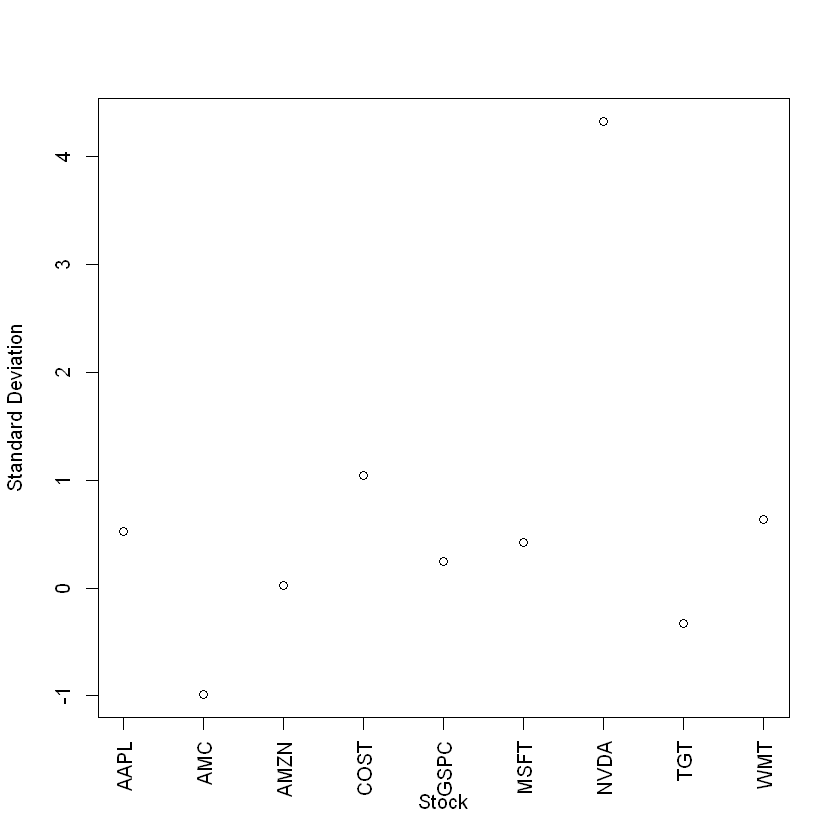

In [18]:
cum_return_list <- list()
for (i in seq_along(stock_df_list)) {
  df <- stock_df_list[[i]]

  standard_dev = sd(df$Return)
  cum_return = Return.cumulative(df$Return, geometric = TRUE)

  #print(table.Stats(df$Return))
  
 
  
  output = c(Stock = names(stock_df_list)[i], Cum_Return = cum_return)
  cum_return_list[[i]] <- output
}

cum_return_df <- do.call(rbind, cum_return_list)

cum_return_df <- as.data.frame(cum_return_df)
print(cum_return_df)

plot(cum_return_df$Cum_Return, xaxt = "n", xlab = "Stock", ylab = "Standard Deviation")

axis(1, at = 1:length(cum_return_df$Stock), labels = sd_df$Stock, las=2)

In [19]:
summary(lm(stock_df_list["AAPL"]$AAPL$Return~stock_df_list["GSPC"]$GSPC$Return))


Call:
lm(formula = stock_df_list["AAPL"]$AAPL$Return ~ stock_df_list["GSPC"]$GSPC$Return)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.103501 -0.030369  0.006615  0.035552  0.109298 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       0.005809   0.008422   0.690    0.495    
stock_df_list["GSPC"]$GSPC$Return 1.202980   0.164508   7.313  1.8e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04999 on 34 degrees of freedom
Multiple R-squared:  0.6113,	Adjusted R-squared:  0.5999 
F-statistic: 53.47 on 1 and 34 DF,  p-value: 1.802e-08


In [108]:
beta_list <- list()

for (i in seq_along(stock_df_list)) {
  df <- stock_df_list[[i]]

  
  lm_model = lm(df$Return~stock_df_list["GSPC"]$GSPC$Return)
  
  r_squared = summary(lm_model)$r.squared
  print(names(stock_df_list)[i])
  print(summary(lm_model))
  
 
  
  output = c(Stock = names(stock_df_list)[i], r_2 = r_squared)
  beta_list[[i]] <- output
}

 beta_df <- do.call(rbind, beta_list)

 beta_df <- as.data.frame(beta_df)
 print(beta_df)
 
  
  


[1] "AAPL"

Call:
lm(formula = df$Return ~ stock_df_list["GSPC"]$GSPC$Return)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.103501 -0.030369  0.006615  0.035552  0.109298 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       0.005809   0.008422   0.690    0.495    
stock_df_list["GSPC"]$GSPC$Return 1.202980   0.164508   7.313  1.8e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04999 on 34 degrees of freedom
Multiple R-squared:  0.6113,	Adjusted R-squared:  0.5999 
F-statistic: 53.47 on 1 and 34 DF,  p-value: 1.802e-08

[1] "AMC"

Call:
lm(formula = df$Return ~ stock_df_list["GSPC"]$GSPC$Return)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62713 -0.14420 -0.02518  0.15934  0.47789 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)                       -0.08794    0.04245  -2.0

Warning message in summary.lm(lm_model):
"essentially perfect fit: summary may be unreliable"


[1] "GSPC"


Warning message in summary.lm(lm_model):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = df$Return ~ stock_df_list["GSPC"]$GSPC$Return)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.363e-17 -5.438e-18 -1.835e-18  1.127e-18  8.884e-17 

Coefficients:
                                    Estimate Std. Error    t value Pr(>|t|)    
(Intercept)                       -3.469e-18  2.730e-18 -1.271e+00    0.212    
stock_df_list["GSPC"]$GSPC$Return  1.000e+00  5.332e-17  1.875e+16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.62e-17 on 34 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 3.517e+32 on 1 and 34 DF,  p-value: < 2.2e-16

[1] "MSFT"

Call:
lm(formula = df$Return ~ stock_df_list["GSPC"]$GSPC$Return)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.090970 -0.027314 -0.009285  0.028964  0.114990 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  

In [21]:
stock_df_list["AAPL"]$AAPL

,Date,Return
,<dttm>,<dbl>
1,2021-09-30,-0.072191738
2,2021-10-29,0.058657229
3,2021-11-30,0.105081867
4,2021-12-31,0.074228550
5,2022-01-31,-0.015712071
6,2022-02-28,-0.054065910
7,2022-03-31,0.057473380
8,2022-04-29,-0.097130847
9,2022-05-31,-0.054495934


In [110]:
aapl_xts <- xts(stock_df_list["COST"]$AAPL$Return, order.by = stock_df_list["AAPL"]$AAPL$Date)
names(aapl_xts) <- "Return"

ERROR: Error in names(coredata(x)) <- value: 'names' attribute [1] must be the same length as the vector [0]


Warning message in table.Drawdowns(xts_table$Return, top = 10, digits = 5):
"Only 3 available in the data."


        From     Trough         To    Depth Length To Trough Recovery
1 2022-01-31 2022-12-30 2023-05-31 -0.26404     17        12        5
2 2023-08-31 2023-10-31 2024-06-28 -0.12955     11         3        8
3 2021-09-30 2021-09-30 2021-11-30 -0.07219      3         1        2


Warning message in table.Drawdowns(xts_table$Return, top = 10, digits = 5):
"Only 1 available in the data."


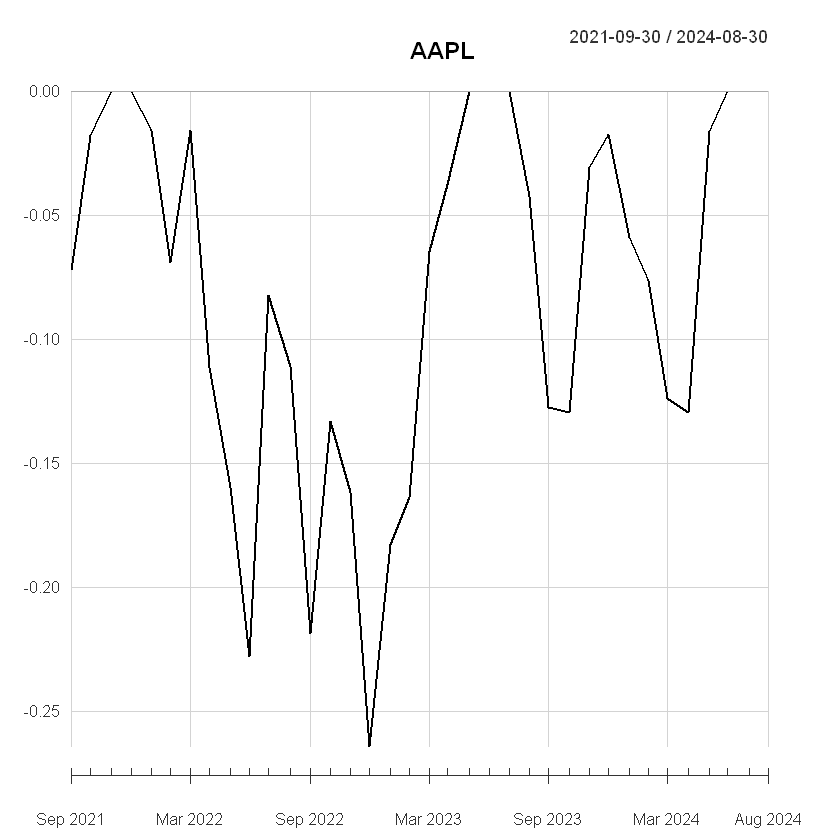

        From     Trough   To    Depth Length To Trough Recovery
1 2021-09-30 2024-04-30 <NA> -0.99329     37        32       NA


Warning message in table.Drawdowns(xts_table$Return, top = 10, digits = 5):
"Only 4 available in the data."


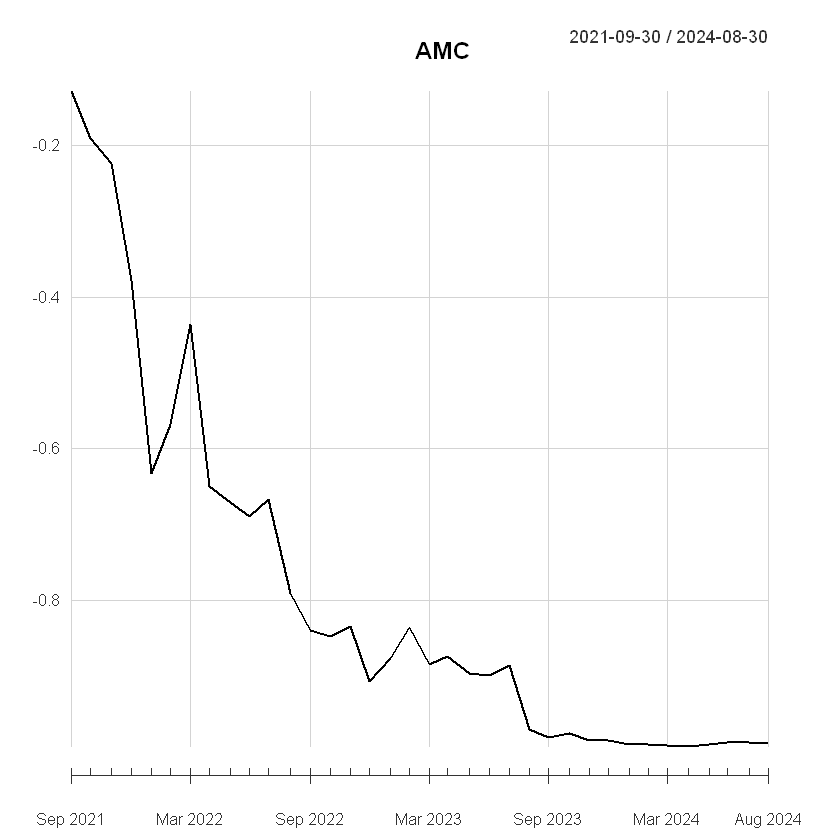

        From     Trough         To    Depth Length To Trough Recovery
1 2021-12-31 2022-12-30 2024-02-29 -0.52097     27        13       14
2 2024-07-31 2024-08-30       <NA> -0.07633      3         2       NA
3 2021-09-30 2021-09-30 2021-11-30 -0.05575      3         1        2
4 2024-04-30 2024-04-30 2024-06-28 -0.02983      3         1        2


Warning message in table.Drawdowns(xts_table$Return, top = 10, digits = 5):
"Only 5 available in the data."


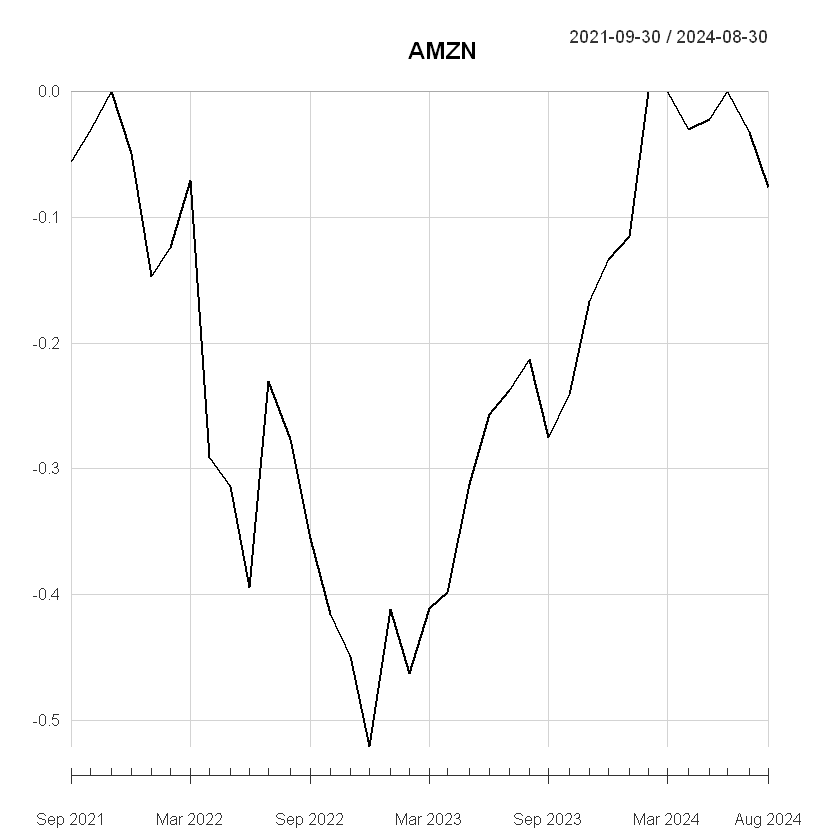

        From     Trough         To    Depth Length To Trough Recovery
1 2022-04-29 2022-12-30 2023-11-30 -0.20316     20         9       11
2 2022-01-31 2022-01-31 2022-03-31 -0.11022      3         1        2
3 2024-07-31 2024-07-31 2024-08-30 -0.03155      2         1        1
4 2024-03-28 2024-04-30 2024-05-31 -0.02666      3         2        1
5 2021-09-30 2021-09-30 2021-10-29 -0.01571      2         1        1


Warning message in table.Drawdowns(xts_table$Return, top = 10, digits = 5):
"Only 4 available in the data."


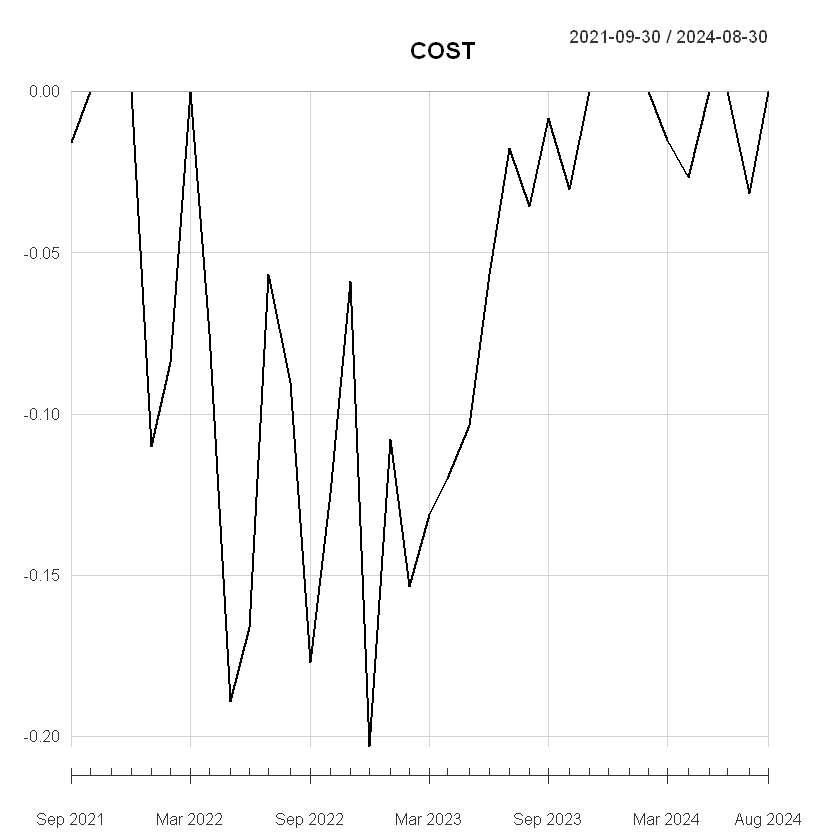

        From     Trough         To    Depth Length To Trough Recovery
1 2022-01-31 2022-09-30 2023-12-29 -0.24770     24         9       15
2 2021-09-30 2021-09-30 2021-10-29 -0.04757      2         1        1
3 2024-04-30 2024-04-30 2024-05-31 -0.04162      2         1        1
4 2021-11-30 2021-11-30 2021-12-31 -0.00833      2         1        1


Warning message in table.Drawdowns(xts_table$Return, top = 10, digits = 5):
"Only 7 available in the data."


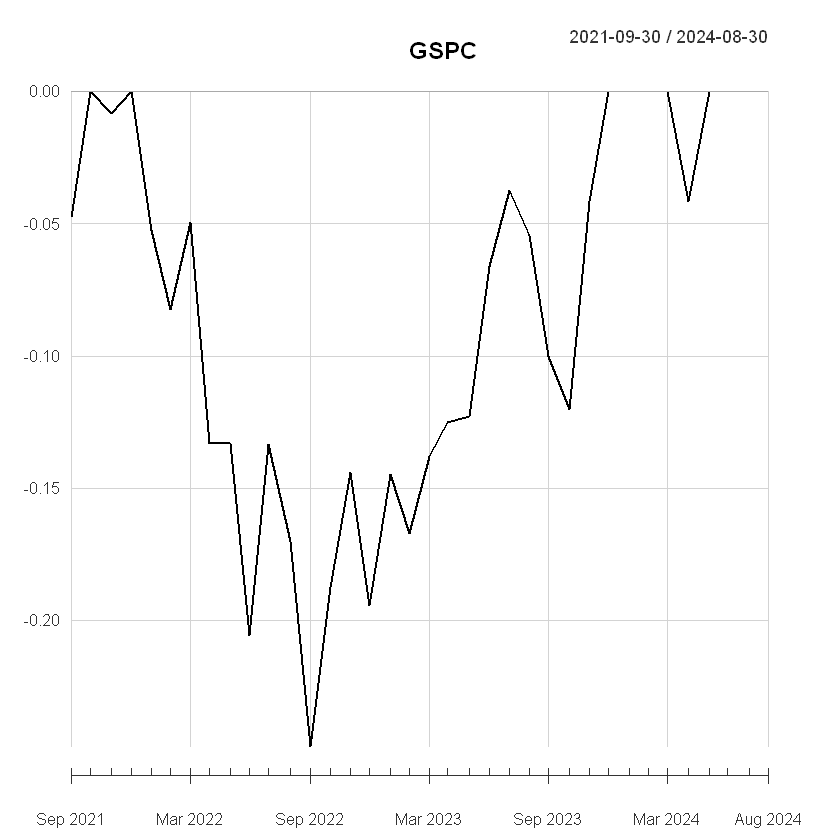

        From     Trough         To    Depth Length To Trough Recovery
1 2022-01-31 2022-10-31 2023-06-30 -0.30528     18        10        8
2 2024-04-30 2024-04-30 2024-06-28 -0.07461      3         1        2
3 2023-07-31 2023-09-29 2023-11-30 -0.07083      5         3        2
4 2021-09-30 2021-09-30 2021-10-29 -0.06596      2         1        1
5 2024-07-31 2024-08-30       <NA> -0.06501      3         2       NA
6 2023-12-29 2023-12-29 2024-01-31 -0.00757      2         1        1
7 2021-11-30 2021-11-30 2021-12-31 -0.00128      2         1        1


Warning message in table.Drawdowns(xts_table$Return, top = 10, digits = 5):
"Only 5 available in the data."


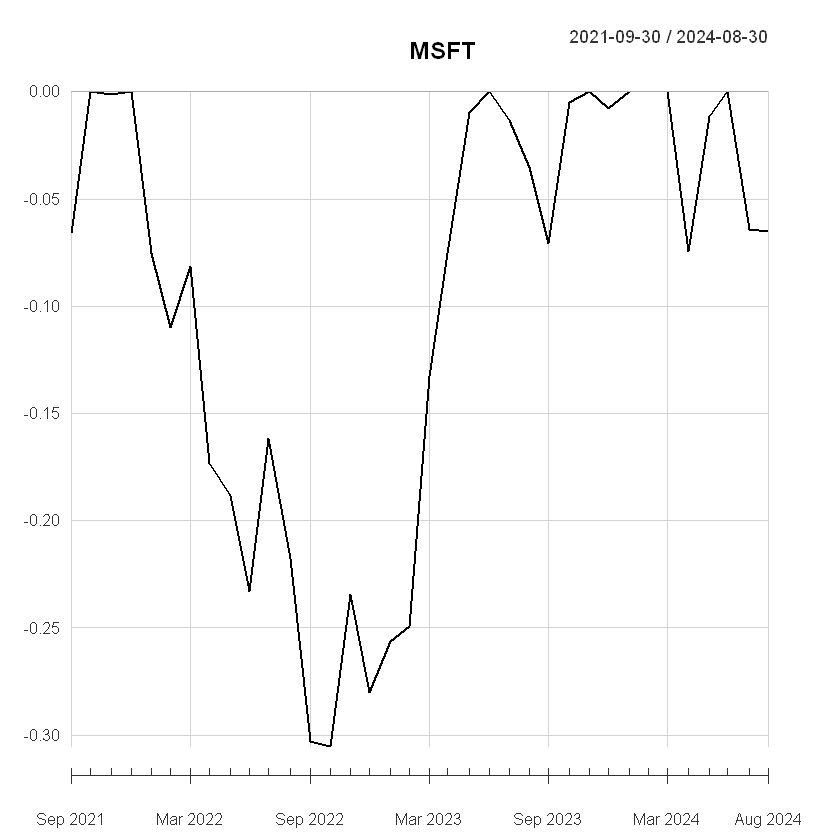

        From     Trough         To    Depth Length To Trough Recovery
1 2021-12-31 2022-09-30 2023-05-31 -0.62821     18        10        8
2 2023-09-29 2023-10-31 2023-12-29 -0.17367      4         2        2
3 2021-09-30 2021-09-30 2021-10-29 -0.07687      2         1        1
4 2024-07-31 2024-07-31       <NA> -0.05278      3         1       NA
5 2024-04-30 2024-04-30 2024-05-31 -0.04376      2         1        1


Warning message in table.Drawdowns(xts_table$Return, top = 10, digits = 5):
"Only 2 available in the data."


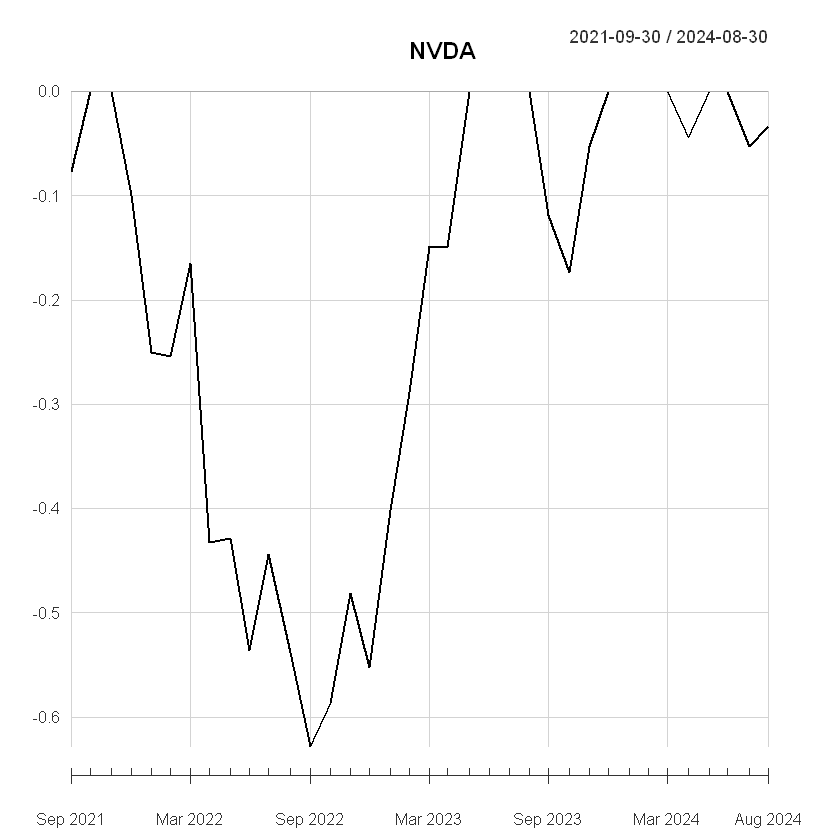

        From     Trough         To    Depth Length To Trough Recovery
1 2021-11-30 2023-09-29       <NA> -0.55411     35        23       NA
2 2021-09-30 2021-09-30 2021-10-29 -0.07144      2         1        1


Warning message in table.Drawdowns(xts_table$Return, top = 10, digits = 5):
"Only 7 available in the data."


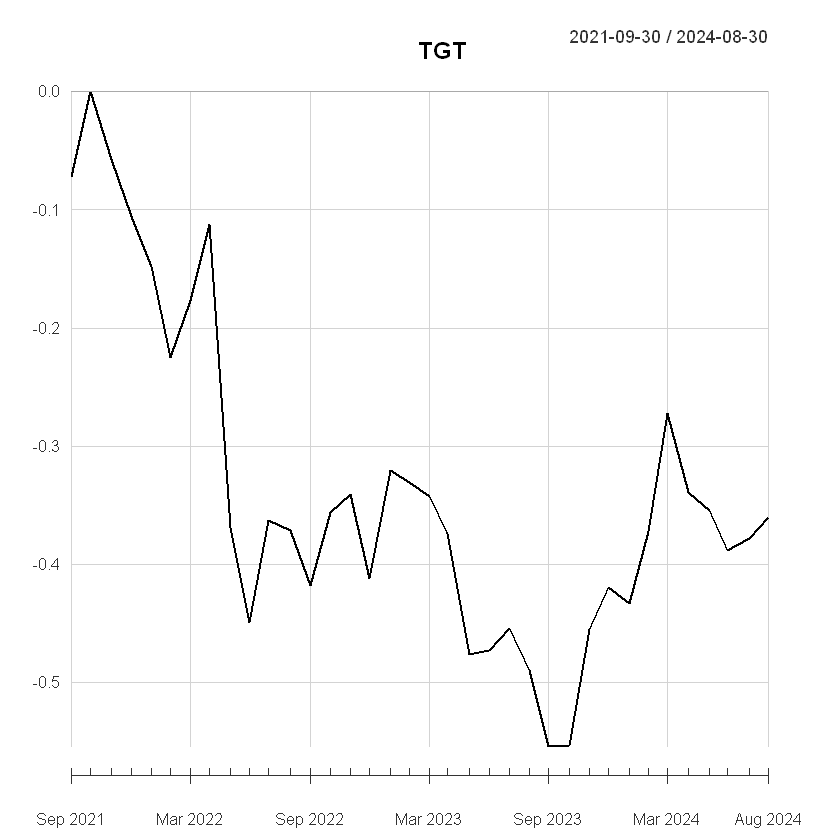

        From     Trough         To    Depth Length To Trough Recovery
1 2022-05-31 2022-06-30 2022-11-30 -0.20242      7         2        5
2 2021-11-30 2022-02-28 2022-03-31 -0.09179      5         4        1
3 2022-12-30 2022-12-30 2023-06-30 -0.06623      7         1        6
4 2021-09-30 2021-09-30 2021-10-29 -0.05684      2         1        1
5 2023-11-30 2023-11-30 2024-01-31 -0.04724      3         1        2
6 2023-09-29 2023-09-29 2023-10-31 -0.01648      2         1        1
7 2024-04-30 2024-04-30 2024-05-31 -0.01363      2         1        1


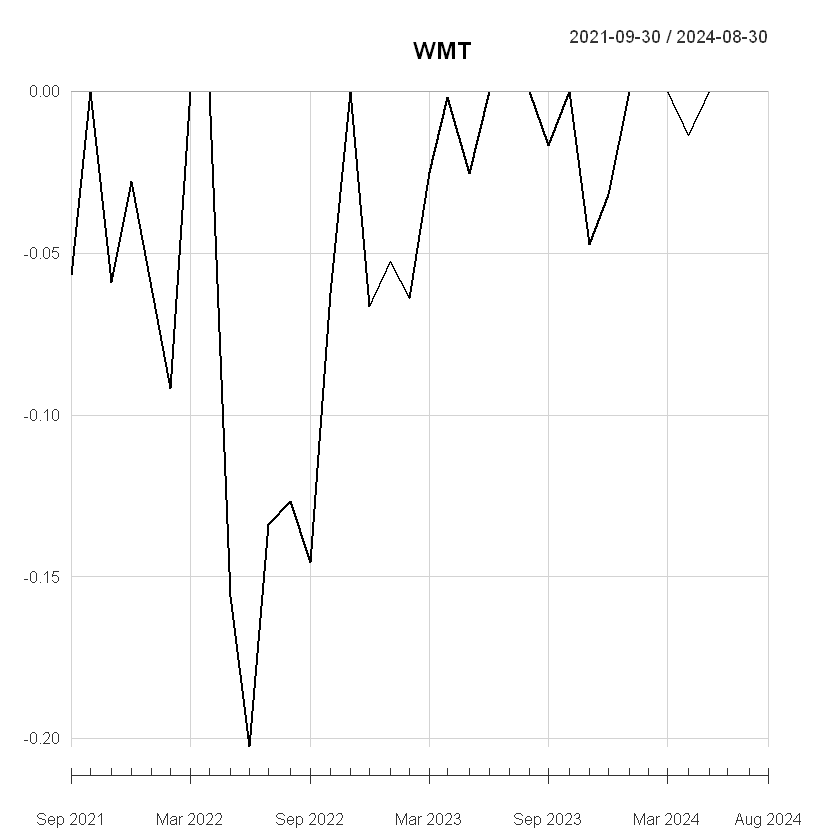

In [23]:
for (i in seq_along(stock_df_list)) {
  df <- stock_df_list[[i]]

  xts_table <- xts(df$Return, order.by = df$Date)
  names(xts_table) <- "Return"


  print(chart.Drawdown(xts_table))
  title(main = names(stock_df_list)[i])
  print(table.Drawdowns(xts_table$Return, top = 10, digits = 5))
 
}

Warning message in table.Drawdowns(aapl_xts$Return, top = 10, digits = 5):
"Only 3 available in the data."


From,Trough,To,Depth,Length,To Trough,Recovery
<dttm>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
2022-01-31,2022-12-30,2023-05-31,-0.26404,17,12,5
2023-08-31,2023-10-31,2024-06-28,-0.12955,11,3,8
2021-09-30,2021-09-30,2021-11-30,-0.07219,3,1,2


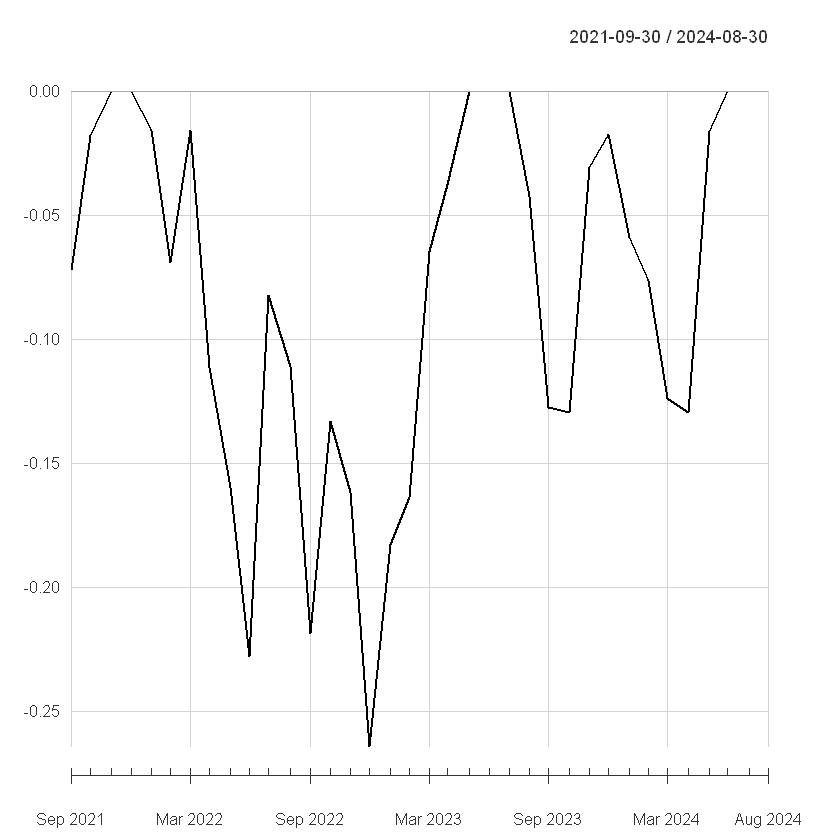

In [24]:
chart.Drawdown(aapl_xts)
table.Drawdowns(aapl_xts$Return, top = 10, digits = 5)

In [25]:
stock_df_list["AAPL"]$AAPL$Return

[1] -0.072191738  0.058657229  0.105081867  0.074228550 -0.015712071
 [6] -0.054065910  0.057473380 -0.097130847 -0.054495934 -0.081429783
[11]  0.188633476 -0.031207921 -0.120976879  0.109551270 -0.033027523
[16] -0.122272433  0.110521043  0.023183088  0.118648633  0.028987167
[21]  0.046058343  0.094330025  0.012785342 -0.042383800 -0.088678333
[26] -0.002569851  0.113780227  0.013582465 -0.042227147 -0.018543163
[31] -0.051286359 -0.006706295  0.130222283  0.095552634  0.054410845
[36]  0.032353498

Module 7

In [3]:
stocks_df = read.csv("Module_07_stock_data.csv")

In [113]:
head(stocks_df)

,Date,AAPL,TSLA,NVDA,AMZN,MSFT,META,GOOGL,BRK.B,XOM,PFE,S.P.500
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023-01-03,123.9046,108.10,14.30558,85.82,236.1835,124.3655,88.89987,309.91,100.4146,46.92820,3824.14
2,2023-01-04,125.1826,113.64,14.73930,85.14,225.8521,126.9877,87.86243,314.55,100.7069,45.89369,3852.97
3,2023-01-05,123.8551,110.34,14.25562,83.12,219.1584,126.5590,85.98708,312.90,102.9601,45.46341,3808.10
4,2023-01-06,128.4122,113.06,14.84922,86.08,221.7412,129.6297,87.12426,318.69,104.2046,46.61693,3895.08
5,2023-01-09,128.9373,119.77,15.61772,87.36,223.9001,129.0813,87.80258,315.53,102.2625,44.30074,3892.09
6,2023-01-10,129.5119,118.85,15.89853,89.87,225.6056,132.5908,88.20159,316.35,103.7897,43.59580,3919.25


In [4]:
stocks_df$Date <- parse_date_time(stocks_df$Date, orders = c("mdy", "ymd", "dmy"), quiet = TRUE)

In [5]:
stocks_df$Date <- parse_date_time(stocks_df$Date, orders = c("mdy", "ymd", "dmy"), quiet = TRUE)
stocks_df_2 = stocks_df[order(stocks_df$Date),]

In [6]:
stocks_df_2[(stocks_df_2$Date>= "2023-01-02" & stocks_df_2$Date <= "2023-01-07"),]

,Date,AAPL,TSLA,NVDA,AMZN,MSFT,META,GOOGL,BRK.B,XOM,PFE,S.P.500
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023-01-03,123.9046,108.10,14.30558,85.82,236.1835,124.3655,88.89987,309.91,100.4146,46.92820,3824.14
2,2023-01-04,125.1826,113.64,14.73930,85.14,225.8521,126.9877,87.86243,314.55,100.7069,45.89369,3852.97
3,2023-01-05,123.8551,110.34,14.25562,83.12,219.1584,126.5590,85.98708,312.90,102.9601,45.46341,3808.10
4,2023-01-06,128.4122,113.06,14.84922,86.08,221.7412,129.6297,87.12426,318.69,104.2046,46.61693,3895.08


In [7]:
stocks_df_3 = xts(stocks_df_2[,-1],order.by = stocks_df_2[,1])

In [ ]:
# stocks_df_3[(stocks_df_3$date> "2014-12-03" & temp$date < "2014-12-05"),]

In [ ]:
# stocks_df_3 %>%
# filter(release_date >= as.Date("2000-01-01") & release_date <= as.Date("2020-12-3"))

In [118]:
tail(stocks_df_3)

Warning message:
"object timezone ('UTC') is different from system timezone ('')"


             AAPL   TSLA     NVDA   AMZN   MSFT     META    GOOGL  BRK.B    XOM
2024-08-23 226.84 220.32 129.3589 177.04 416.79 527.4968 165.4005 453.38 116.32
2024-08-26 227.18 213.21 126.4492 175.50 413.49 520.6234 165.9398 454.49 118.81
2024-08-27 228.03 209.21 128.2890 173.12 413.84 518.6052 164.4618 460.63 117.68
2024-08-28 226.49 205.75 125.5993 170.80 410.60 516.2875 162.6342 464.59 116.52
2024-08-29 229.79 206.28 117.5799 172.12 413.12 517.7261 161.5656 468.37 118.13
2024-08-30 229.00 214.11 119.3598 178.50 417.14 520.8132 163.1635 475.92 117.94
             PFE S.P.500
2024-08-23 28.90 5634.61
2024-08-26 28.92 5616.84
2024-08-27 28.82 5625.80
2024-08-28 28.75 5592.18
2024-08-29 28.72 5591.96
2024-08-30 29.01 5648.40

In [50]:
jpm_returns <- stocks_df %>%  # create a dplyr dataframe 
  summarise(return = (AAPL -lag(AAPL)/lag(AAPL)))

Warning message:
"Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly."


In [53]:
colnames(stocks_df_3)

[1] "AAPL"    "TSLA"    "NVDA"    "AMZN"    "MSFT"    "META"    "GOOGL"  
 [8] "BRK.B"   "XOM"     "PFE"     "S.P.500"

In [8]:
for (cols in colnames(stocks_df_3)[1:11]) {
  
    new_col_name <- paste0(cols, "_returns")
    
    # Calculate returns
    returns <- (stocks_df_3[, cols] - lag(stocks_df_3[, cols])) / lag(stocks_df_3[, cols])
    
    # Merge the returns as a new column in the xts object
    stocks_df_3 <- merge(stocks_df_3, setNames(returns, new_col_name))
}

# View the updated xts object
#head(stocks_df)

In [9]:
stocks_df_3 <- na.omit(stocks_df_3)

In [10]:
colnames(stocks_df_3)

[1] "AAPL"            "TSLA"            "NVDA"            "AMZN"           
 [5] "MSFT"            "META"            "GOOGL"           "BRK.B"          
 [9] "XOM"             "PFE"             "S.P.500"         "AAPL_returns"   
[13] "TSLA_returns"    "NVDA_returns"    "AMZN_returns"    "MSFT_returns"   
[17] "META_returns"    "GOOGL_returns"   "BRK.B_returns"   "XOM_returns"    
[21] "PFE_returns"     "S.P.500_returns"

In [11]:
tail(stocks_df_3)

Warning message:
"object timezone ('UTC') is different from system timezone ('')
  NOTE: set 'options(xts_check_TZ = FALSE)' to disable this warning
    This note is displayed once per session"


             AAPL   TSLA     NVDA   AMZN   MSFT     META    GOOGL  BRK.B    XOM
2024-08-23 226.84 220.32 129.3589 177.04 416.79 527.4968 165.4005 453.38 116.32
2024-08-26 227.18 213.21 126.4492 175.50 413.49 520.6234 165.9398 454.49 118.81
2024-08-27 228.03 209.21 128.2890 173.12 413.84 518.6052 164.4618 460.63 117.68
2024-08-28 226.49 205.75 125.5993 170.80 410.60 516.2875 162.6342 464.59 116.52
2024-08-29 229.79 206.28 117.5799 172.12 413.12 517.7261 161.5656 468.37 118.13
2024-08-30 229.00 214.11 119.3598 178.50 417.14 520.8132 163.1635 475.92 117.94
             PFE S.P.500 AAPL_returns TSLA_returns NVDA_returns AMZN_returns
2024-08-23 28.90 5634.61  0.010288147  0.045855898   0.04549861  0.005166572
2024-08-26 28.92 5616.84  0.001498838 -0.032271244  -0.02249363 -0.008698562
2024-08-27 28.82 5625.80  0.003741554 -0.018760846   0.01455012 -0.013561281
2024-08-28 28.75 5592.18 -0.006753468 -0.016538438  -0.02096651 -0.013401064
2024-08-29 28.72 5591.96  0.014570125  0.002575936  -0.

In [12]:
for (cols in colnames(stocks_df_3)[12:22]){

    print(cols)
    
   print( SharpeRatio(stocks_df_3[, cols],.04/252))
}

[1] "AAPL_returns"
                              AAPL_returns
StdDev Sharpe (Rf=0%, p=95%):   0.10261117
VaR Sharpe (Rf=0%, p=95%):      0.07466168
ES Sharpe (Rf=0%, p=95%):       0.05595160
[1] "TSLA_returns"
                              TSLA_returns
StdDev Sharpe (Rf=0%, p=95%):   0.06002297
VaR Sharpe (Rf=0%, p=95%):      0.04080616
ES Sharpe (Rf=0%, p=95%):       0.03055124
[1] "NVDA_returns"
                              NVDA_returns
StdDev Sharpe (Rf=0%, p=95%):    0.1668490
VaR Sharpe (Rf=0%, p=95%):       0.1883782
ES Sharpe (Rf=0%, p=95%):        0.1883782
[1] "AMZN_returns"
                              AMZN_returns
StdDev Sharpe (Rf=0%, p=95%):   0.09158981
VaR Sharpe (Rf=0%, p=95%):      0.06276420
ES Sharpe (Rf=0%, p=95%):       0.04266625
[1] "MSFT_returns"
                              MSFT_returns
StdDev Sharpe (Rf=0%, p=95%):   0.09017615
VaR Sharpe (Rf=0%, p=95%):      0.06170371
ES Sharpe (Rf=0%, p=95%):       0.04562269
[1] "META_returns"


VaR calculation produces unreliable result (inverse risk) for column: 1 : -0.00202810071456462



                              META_returns
StdDev Sharpe (Rf=0%, p=95%):   0.14142748
VaR Sharpe (Rf=0%, p=95%):              NA
ES Sharpe (Rf=0%, p=95%):       0.06289563
[1] "GOOGL_returns"
                              GOOGL_returns
StdDev Sharpe (Rf=0%, p=95%):    0.07931645
VaR Sharpe (Rf=0%, p=95%):       0.05378617
ES Sharpe (Rf=0%, p=95%):        0.03282169
[1] "BRK.B_returns"
                              BRK.B_returns
StdDev Sharpe (Rf=0%, p=95%):    0.10584038
VaR Sharpe (Rf=0%, p=95%):       0.06803063
ES Sharpe (Rf=0%, p=95%):        0.04724292
[1] "XOM_returns"
                              XOM_returns
StdDev Sharpe (Rf=0%, p=95%):  0.02305129
VaR Sharpe (Rf=0%, p=95%):     0.01477650
ES Sharpe (Rf=0%, p=95%):      0.01110577
[1] "PFE_returns"
                              PFE_returns
StdDev Sharpe (Rf=0%, p=95%): -0.08263805
VaR Sharpe (Rf=0%, p=95%):    -0.05055253
ES Sharpe (Rf=0%, p=95%):     -0.03629650
[1] "S.P.500_returns"
                              S.P.500_retu

                                 Average
StdDev Sharpe (Rf=0%, p=95%): 0.14281279
VaR Sharpe (Rf=0%, p=95%):    0.09933910
ES Sharpe (Rf=0%, p=95%):     0.07419542

In [13]:
for (cols in colnames(stocks_df_3)[12:22]){

    print(cols)
    
    print(TreynorRatio(stocks_df_3[, cols],stocks_df_3$S.P.500_returns,.04/252))
}

[1] "AAPL_returns"
[1] 0.364819
[1] "TSLA_returns"
[1] 0.2054808
[1] "NVDA_returns"
[1] 1.031937
[1] "AMZN_returns"
[1] 0.3221144
[1] "MSFT_returns"
[1] 0.2996651
[1] "META_returns"
[1] 0.7349736
[1] "GOOGL_returns"
[1] 0.2898155
[1] "BRK.B_returns"
[1] 0.3953052
[1] "XOM_returns"
[1] 0.153499
[1] "PFE_returns"
[1] -0.8044181
[1] "S.P.500_returns"
[1] 0.2162104


In [14]:
head(stocks_df_3)

Warning message:
"object timezone ('UTC') is different from system timezone ('')"


               AAPL   TSLA     NVDA  AMZN     MSFT     META    GOOGL  BRK.B
2023-01-04 125.1826 113.64 14.73930 85.14 225.8521 126.9877 87.86243 314.55
2023-01-05 123.8551 110.34 14.25562 83.12 219.1584 126.5590 85.98708 312.90
2023-01-06 128.4122 113.06 14.84922 86.08 221.7412 129.6297 87.12426 318.69
2023-01-09 128.9373 119.77 15.61772 87.36 223.9001 129.0813 87.80258 315.53
2023-01-10 129.5119 118.85 15.89853 89.87 225.6056 132.5908 88.20159 316.35
2023-01-11 132.2462 123.22 15.99047 95.09 232.4275 132.4911 91.29394 320.37
                XOM      PFE S.P.500 AAPL_returns TSLA_returns NVDA_returns
2023-01-04 100.7069 45.89369 3852.97  0.010314199  0.051248853  0.030317947
2023-01-05 102.9601 45.46341 3808.10 -0.010604564 -0.029039098 -0.032815728
2023-01-06 104.2046 46.61693 3895.08  0.036794034  0.024651090  0.041640286
2023-01-09 102.2625 44.30074 3892.09  0.004088823  0.059349011  0.051753250
2023-01-10 103.7897 43.59580 3919.25  0.004456313 -0.007681374  0.017980486
2023-01-11 1

In [15]:
for (cols in colnames(stocks_df_3)[12:22]) {
  
    new_col_name <- paste0(cols, "_returns_v_risk_free")
    
    # Calculate returns
    returns <- stocks_df_3[, cols] - (.04/252)
    
    # Merge the returns as a new column in the xts object
    stocks_df_3 <- merge(stocks_df_3, setNames(returns, new_col_name))
}

# View the updated xts object
#head(stocks_df)

In [20]:
stocks_df_3$Average <- rowMeans(stocks_df_3[, c("AAPL_returns", "TSLA_returns", "NVDA_returns")])

In [21]:
print( SharpeRatio(stocks_df_3$Average,.04/252))

                                 Average
StdDev Sharpe (Rf=0%, p=95%): 0.14281279
VaR Sharpe (Rf=0%, p=95%):    0.09933910
ES Sharpe (Rf=0%, p=95%):     0.07419542


In [18]:
for (cols in colnames(stocks_df_3)[23:33]) {
  
    new_col_name <- paste0(cols,"jensens")
    print(new_col_name)
    
    # Calculate returns
    basicmodel = lm(stocks_df_3[, cols] ~ S.P.500_returns_returns_v_risk_free, data=stocks_df_3)
    print(basicmodel$coefficients)
    
    # Merge the returns as a new column in the xts object
    #stocks_df_3 <- merge(stocks_df_3, setNames(returns, new_col_name))
    }

[1] "AAPL_returns_returns_v_risk_freejensens"
                        (Intercept) S.P.500_returns_returns_v_risk_free 
                       0.0005371558                        1.0763663726 
[1] "TSLA_returns_returns_v_risk_freejensens"
                        (Intercept) S.P.500_returns_returns_v_risk_free 
                       0.0002915451                        2.2004740464 
[1] "NVDA_returns_returns_v_risk_freejensens"
                        (Intercept) S.P.500_returns_returns_v_risk_free 
                        0.003526462                         2.387101038 
[1] "AMZN_returns_returns_v_risk_freejensens"
                        (Intercept) S.P.500_returns_returns_v_risk_free 
                       0.0005424136                        1.5390250854 
[1] "MSFT_returns_returns_v_risk_freejensens"
                        (Intercept) S.P.500_returns_returns_v_risk_free 
                       0.0003520141                        1.1846043884 
[1] "META_returns_returns_v_risk_freejen

Module 8

In [81]:
mod_9_data = read.csv("Module_08_fall_2024.csv")

In [83]:
mod_9_data$Date <- parse_date_time(mod_9_data$Date, orders = c("mdy", "ymd", "dmy"), quiet = TRUE)
mod_9_data_2 = mod_9_data[order(mod_9_data$Date),]

In [85]:
mod_9_data_2$FITLX_RF = mod_9_data_2$FITLX - mod_9_data_2$RF

In [95]:
mod_9_data_2$MKT_RF = mod_9_data_2$MKT - mod_9_data_2$RF

In [96]:
head(mod_9_data_2)

,Date,FITLX,MKT,RF,SMB,HML,MOM,BAB,QMJ,FITLX_RF,MKT_RF
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023-01-03,-0.2400827,-0.46,0.02,-0.17,0.22,-1.58,0.44,-0.35,-0.26008272,-0.48
2,2023-01-04,0.6016745,0.92,0.02,0.64,0.14,-2.09,-0.09,-0.66,0.58167448,0.90
3,2023-01-05,-1.3157857,-1.09,0.02,0.21,1.32,1.16,0.79,0.46,-1.33578568,-1.11
4,2023-01-06,2.1818256,2.25,0.02,0.07,-0.02,-0.20,0.24,0.77,2.16182562,2.23
5,2023-01-09,0.1186059,0.09,0.02,0.39,-0.95,-1.72,-1.08,0.03,0.09860592,0.07
6,2023-01-10,0.7109068,0.76,0.02,0.81,-0.82,-0.65,-0.43,0.01,0.69090679,0.74


In [89]:
flix_returns <- mod_9_data_2 %>%  # create a dplyr dataframe 
  summarise(return = (FITLX_RF -lag(FITLX_RF))/lag(FITLX_RF))

Warning message:
"Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly."


In [93]:
mean(mod_9_data_2$FITLX_RF)

[1] 0.08599678

In [94]:
sd(mod_9_data_2$FITLX_RF)

[1] 0.8457856

In [98]:
nrow(mod_9_data_2)

[1] 396

In [99]:
qt(0.05, 396, lower.tail = FALSE)


[1] 1.648711

In [97]:
summary(lm(FITLX_RF~MKT_RF,data = mod_9_data_2))


Call:
lm(formula = FITLX_RF ~ MKT_RF, data = mod_9_data_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74016 -0.12266  0.00849  0.11526  1.14229 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.005876   0.010294   0.571    0.568    
MKT_RF      1.022491   0.012777  80.025   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2039 on 394 degrees of freedom
Multiple R-squared:  0.942,	Adjusted R-squared:  0.9419 
F-statistic:  6404 on 1 and 394 DF,  p-value: < 2.2e-16


In [100]:
summary(lm(FITLX_RF~MKT_RF+SMB+HML,data = mod_9_data_2))


Call:
lm(formula = FITLX_RF ~ MKT_RF + SMB + HML, data = mod_9_data_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51422 -0.08704  0.00275  0.08443  0.83653 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.004208   0.007227  -0.582    0.561    
MKT_RF       1.030337   0.009857 104.524  < 2e-16 ***
SMB         -0.155989   0.012969 -12.028  < 2e-16 ***
HML         -0.100330   0.012144  -8.262 2.24e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1428 on 392 degrees of freedom
Multiple R-squared:  0.9717,	Adjusted R-squared:  0.9715 
F-statistic:  4488 on 3 and 392 DF,  p-value: < 2.2e-16


In [101]:
summary(lm(FITLX_RF~MKT_RF+SMB+HML+MOM,data = mod_9_data_2))


Call:
lm(formula = FITLX_RF ~ MKT_RF + SMB + HML + MOM, data = mod_9_data_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53654 -0.08345  0.00179  0.08369  0.81567 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.003239   0.007182  -0.451  0.65223    
MKT_RF       1.028999   0.009797 105.037  < 2e-16 ***
SMB         -0.142770   0.013813 -10.336  < 2e-16 ***
HML         -0.100507   0.012053  -8.339  1.3e-15 ***
MOM          0.024683   0.009360   2.637  0.00869 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1417 on 391 degrees of freedom
Multiple R-squared:  0.9722,	Adjusted R-squared:  0.9719 
F-statistic:  3419 on 4 and 391 DF,  p-value: < 2.2e-16


In [102]:
summary(lm(FITLX_RF~MKT_RF+SMB+HML+MOM+QMJ+BAB,data = mod_9_data_2))


Call:
lm(formula = FITLX_RF ~ MKT_RF + SMB + HML + MOM + QMJ + BAB, 
    data = mod_9_data_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56151 -0.07374  0.00484  0.08200  0.77765 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.004599   0.007204  -0.638    0.524    
MKT_RF       1.023222   0.010808  94.676  < 2e-16 ***
SMB         -0.133928   0.015298  -8.755  < 2e-16 ***
HML         -0.086376   0.015617  -5.531 5.86e-08 ***
MOM          0.022747   0.009491   2.397    0.017 *  
QMJ          0.032868   0.022775   1.443    0.150    
BAB         -0.034432   0.022754  -1.513    0.131    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1413 on 389 degrees of freedom
Multiple R-squared:  0.9725,	Adjusted R-squared:  0.9721 
F-statistic:  2293 on 6 and 389 DF,  p-value: < 2.2e-16
